# Proyek Analisis Data: [Brazilian E-Commerce Public Dataset by Olist]
- **Nama:** Dionisius Tiksna Pratito
- **Email:** dionisiustiksna@mail.ugm.ac.id
- **ID Dicoding:** diontiksna

## Menentukan Pertanyaan Bisnis

1. Apa saja lima kota teratas dengan jumlah pelanggan paling banyak?
2. Apa saja lima state teratas dengan jumlah pelanggan terbanyak?
3. Kategori produk apa yang memiliki rata-rata pendapatan tertinggi?
4. Apa kategori produk dengan pendapatan terbesar di tiap state?
5. Bagaimana performa penjualan dalam beberapa bulan terakhir?
6. Berapa rata-rata harga tiap kategori produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Membuat DataFrame untuk menampung dan membaca data csv yang diimpor dari Google Drive.

In [3]:
customers_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_geolocation_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_orders_dataset.csv')
product_category_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/product_category_name_translation.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_sellers_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Olist - Dicoding/olist_order_items_dataset.csv')


### Assessing Data

Data pertama yang akan dinilai adalah customers_df. Tipe data dari tiap kolom diperiksa dengan menggunakan method info().

In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Tampak bahwa tidak terdapat perbedaan jumlah data. Hal ini kemudian diperiksa kembali dengan mengecek apakah ada missing value atau tidak dengan method isna(). Ternyata, hasilnya menunjukkan bahwa tidak ada data yang hilang.

In [6]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Kemudian dilakukan pemeriksaan berapa banyak jumlah data yang unik untuk tiap parameter dengan nunique().

In [7]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Masalah berikutnya yang diperiksa adalah duplikasi data, untuk memeriksa hal ini digunakan method duplicated().

In [8]:
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  0


### Menilai tabel ***geolocation_df***

In [9]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [10]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [11]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

Dilakukan pengecekan apakah terdapat data yang duplikat atau tidak. Untuk melakukan hal itu, digunakan method duplicated() dan ternyata terdapat 261.831 data yang duplikat.

In [12]:
geolocation_df.duplicated().sum()

261831

## Menilai tabel ***order_items_df***

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Diperiksa apakah terdapat data duplikat pada parameter yang seharusnya bernilai unik untuk semua data. Dengan melakukan method duplicated() pada 'order_id' ditemukan terdapat 13.984 data duplikat.

In [15]:
order_items_df.duplicated('order_id').sum()

13984

### Menilai tabel ***order_payments_df***

In [16]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
order_payments_df.duplicated('order_id').sum()

4446

In [18]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

## Menilai tabel ***order_reviews_df***

Dilakukan pemeriksaan jumlah dan tipe data pada tiap parameter. Terdapat kekeliuran tipe data pada review_answer_timestamp dan review_creation_data yang seharusnya bertipe data datetime serta bukan object.

In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [22]:
print(f'Jumlah review_id duplikat: ', order_reviews_df.duplicated('review_id').sum())
print(f'Jumlah order_id duplikat: ', order_reviews_df.duplicated('order_id').sum())

Jumlah review_id duplikat:  814
Jumlah order_id duplikat:  551


## Menilai tabel ***orders_df***

Terdapat kekeliruan yang sama yaitu tipe data yang tidak sesuai pada order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya bertipe data datetime.

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Tampak bahwa terdapat banyak missing value pada beberapa parameter.

In [24]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
print('Jumlah duplikasi: ', orders_df.duplicated().sum())

Jumlah duplikasi:  0


## Menilai tabel ***product_category_df***

In [26]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Menilai tabel ***products_df***

Dengan pemeriksaan menggunakan method info(), terdapat kesalahan tipe data pada product_name_lenght, product_description_lenght, product_photos_qty yang seharusnya bertipe data integer. Terdapat pula typo pada penulisan nama kolom product_name_lenght dan product_description_lenght.

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

## Menilai tabel ***sellers_df***

In [30]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data

Menghapus semua data duplikat pada order_id pada tabel order_items_df. Kemudian memeriksa apakah terdapat data duplikat.

In [32]:
order_items_df.drop_duplicates(subset = 'order_id', inplace = True)
print(f'Jumlah order_id duplikat: ', order_items_df.duplicated('order_id').sum())

Jumlah order_id duplikat:  0


Mengubah tipe data shipping_limit_date menjadi datetime.

In [33]:
order_items_df['shipping_limit_date'] = order_items_df['shipping_limit_date'].astype('datetime64[ns]')

Menghapus data duplikat yang ada di data order_reviews_df pada kolom review_id dan order_id.

In [34]:
order_reviews_df.drop_duplicates(subset = 'review_id', inplace = True)

In [35]:
print(f'Jumlah review_id duplikat: ', order_reviews_df.duplicated('review_id').sum())

Jumlah review_id duplikat:  0


In [36]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98167
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

Mengubah tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi datetime.

In [37]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [38]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


Mengubah tipe data orders_df pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime.

In [39]:
datetime_columns_orders = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

Memperbaiki kesalahan penulisan pada kolom product_name_lenght dan product_description_lenght menjadi product_name_length dan product_description_length pada products_df.

In [40]:
products_df.rename(columns = {'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'}, inplace=True)

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Untuk menilai distribusi pada beberapa parameter yang memiliki missing values, terlebih dahulu mengamati skewness. Tampak bahwa data mengalami skewed yang cukup kentara.

In [42]:
products_df.skew(axis = 0, skipna = True)

<ipython-input-42-7653cf184727>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  products_df.skew(axis = 0, skipna = True)


product_name_length          -0.903222
product_description_length    1.962093
product_photos_qty            2.193409
product_weight_g              3.604860
product_length_cm             1.750460
product_height_cm             2.140061
product_width_cm              1.670971
dtype: float64

Untuk memberikan ilustrasi, digunakan histplot dalam menjelaskan skewness dari data. Data yang digunakan dalam ilustrasi ini adalah product_name_length.

<Axes: xlabel='product_name_length', ylabel='Count'>

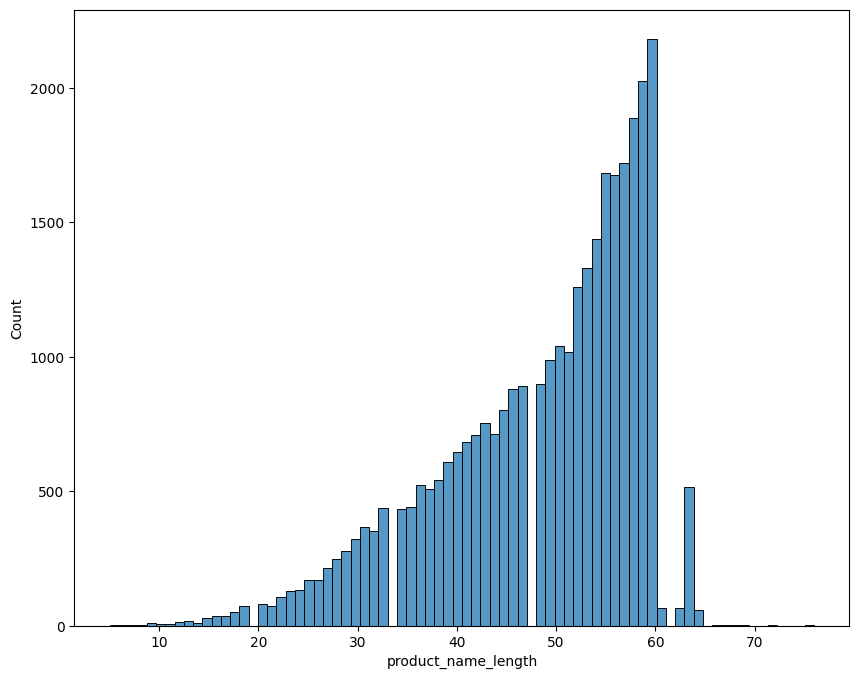

In [43]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(products_df['product_name_length'])

In [44]:
products_columns = products_df.iloc[:,2:].columns

for column in products_columns:
  products_df[column].fillna(products_df[column].median(), inplace=True)

products_df['product_category_name'].fillna(products_df['product_category_name'])

0                               perfumaria
1                                    artes
2                            esporte_lazer
3                                    bebes
4                    utilidades_domesticas
                       ...                
32946                     moveis_decoracao
32947    construcao_ferramentas_iluminacao
32948                      cama_mesa_banho
32949               informatica_acessorios
32950                      cama_mesa_banho
Name: product_category_name, Length: 32951, dtype: object

In [45]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

Mengisi missing value pada kolom product_category_name dengan metode interpolate.

In [46]:
products_df['product_category_name'].interpolate(method='pad',axis=0, limit_direction='forward', inplace=True)

In [47]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Mengubah tipe data object menjadi integer untuk beberapa kolom.

In [48]:
product_obj = ['product_name_length', 'product_description_length', 'product_photos_qty']

for column in product_obj:
  products_df[column] = products_df[column].astype(int)

In [49]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int64  
 3   product_description_length  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


Menggabungkan data antara products_df dengan product_category_df

In [50]:
products2_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='outer',
    left_on='product_category_name',

    right_on='product_category_name'
)

Menggabungkan order_items_df dan order_payment_df

In [51]:
orders2_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)

Menggabungkan orders2_df dan products2_df

In [52]:
gabungan1_df = pd.merge(
    left=orders2_df,
    right=products2_df,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)

Menggabungkan orders_df dan customers_df

In [53]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)

Menggabungkan gabungan1_df dan orders_customers_df

In [54]:
all_df = pd.merge(
    left=gabungan1_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [55]:
all_df = all_df.dropna(subset='customer_zip_code_prefix')

In [56]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,boleto,1.0,...,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,0fb8e3eab2d3e79d92bb3fffbb97f188,75800.0,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,credit_card,2.0,...,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,3419052c8c6b45daf79c1e426f9e9bcb,30720.0,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,credit_card,3.0,...,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,e7c828d22c0682c1565252deefbe334d,83070.0,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,credit_card,4.0,...,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400.0,conselheiro lafaiete,MG


In [57]:
all_df['customer_zip_code_prefix'] = all_df['customer_zip_code_prefix'].astype(int)

<ipython-input-57-bb3bd2403e9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['customer_zip_code_prefix'] = all_df['customer_zip_code_prefix'].astype(int)


## Exploratory Data Analysis (EDA)

Menghilangkan missing values pada tabel orders_customers_df.

In [58]:
orders_customers_df.dropna(axis=0, inplace=True)

Melakukan perhitungan berapa lama waktu pengiriman pesanan.

In [59]:
delivery_time = orders_customers_df['order_delivered_customer_date'] - orders_customers_df['order_approved_at']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_customers_df['delivery_time'] = round(delivery_time/60)

In [60]:
orders_customers_df['delivery_time'].describe()

count     96461.000000
mean      17467.105462
std       13703.078631
min      -10065.000000
25%        9086.000000
50%       14187.000000
75%       21803.000000
max      300241.000000
Name: delivery_time, dtype: float64

In [61]:
orders_customers_df = orders_customers_df.drop(orders_customers_df[orders_customers_df['delivery_time']<1].index)

Tampak pada data deskriptif dari delivery time terdapat data yang bernilai negatif. Untuk itu, dilakukan penghapusan data yang bernilai invalid dengan asumsi pengiriman memakan waktu lebih atau sama dengan 1 menit.

In [62]:
orders_customers_df.sort_values(by='delivery_time', ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time
25702,9bccdd3552c2a68af6d166dfd82be6ba,b4e1d5fdf13905222b7a571b9edad9ef,delivered,2018-04-21 13:03:33,2018-04-24 18:05:57,2018-04-23 18:16:54,2018-04-24 18:16:59,2018-05-08,9eb5dbe2b5f217e8a10c5b7e14b90346,8290,sao paulo,SP,11.0
4061,26449e55a87a5c565d60238999c380ff,3ebd7c64f990c7558321fb5af7a547b9,delivered,2018-04-22 18:05:20,2018-04-24 18:55:14,2018-04-23 10:42:46,2018-04-24 19:11:46,2018-05-04,67e01e8409e5b0735a24e54759195613,12307,jacarei,SP,17.0
98710,1378f9601350615613cc8832d6789c5d,988126b4ddf725d9724e4318872ea2ae,delivered,2017-09-01 20:28:02,2017-09-13 22:03:51,2017-09-04 18:07:55,2017-09-13 22:24:46,2017-09-29,507dc9becd4fc65635d90682dfa9d3a3,98900,santa rosa,RS,21.0
23566,fe857b5ac310b06adabd0e18af932cc5,3a5e6f873f45644fdfea652076839de0,delivered,2018-04-22 23:12:46,2018-04-24 18:53:22,2018-04-23 18:37:43,2018-04-24 19:17:28,2018-05-10,a853fbe4c65c24952022a30655adb74f,18090,sorocaba,SP,24.0
80928,339063a819f93e6e25102c3bb66ab667,73e1e70b645c6ef82dda64348a5c2391,delivered,2018-04-20 13:46:38,2018-04-24 19:18:43,2018-04-23 19:26:40,2018-04-24 19:51:47,2018-05-09,b88d7e07a1508ee88d1ca350f201a2a1,8596,itaquaquecetuba,SP,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,280201.0
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,280272.0
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,c6c0b794d3e4eb69cd85d1438a0db26e,64023,teresina,PI,280584.0
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,300008.0


Tampak bahwa waktu pengiriman berkisar dari 0 hari (dikirim dalam hari yang sama) hingga 209 hari. Rata-rata waktu pengiriman yaitu 12 hari dengan standar deviasi 9,5 hari.

In [63]:
orders_customers_df['delivery_time'] = round(delivery_time/86400)
orders_customers_df['delivery_time'].describe()

count    96400.000000
mean        12.128122
std          9.516826
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

In [64]:
orders_customers_df = orders_customers_df.dropna(subset=['delivery_time'])
orders_customers_df['delivery_time'] = orders_customers_df['delivery_time'].astype(int)

In [65]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96400 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96400 non-null  object        
 1   customer_id                    96400 non-null  object        
 2   order_status                   96400 non-null  object        
 3   order_purchase_timestamp       96400 non-null  datetime64[ns]
 4   order_approved_at              96400 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96400 non-null  datetime64[ns]
 6   order_delivered_customer_date  96400 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96400 non-null  datetime64[ns]
 8   customer_unique_id             96400 non-null  object        
 9   customer_zip_code_prefix       96400 non-null  int64         
 10  customer_city                  96400 non-null  object        
 11  customer_state 

Jumlah customer berdasarkan kota

In [66]:
sorted_city = orders_customers_df.groupby(by='customer_city').customer_id.nunique().reset_index().sort_values(by='customer_id', ascending=False).head()
sorted_city

,customer_city,customer_id
3563,sao paulo,15019
3126,rio de janeiro,6602
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1486


Jumlah customer berdasarkan state

In [67]:
sorted_state = orders_customers_df.groupby(by='customer_state').customer_id.nunique().reset_index().sort_values(by='customer_id', ascending=False).head()
sorted_state

,customer_state,customer_id
25,SP,40436
18,RJ,12349
10,MG,11350
22,RS,5342
17,PR,4920


Pivot table untuk revenue dan quantity berdasarkan kategori produk.

In [68]:
revenue_bycategory_df = gabungan1_df.groupby(by='product_category_name_english').agg({
    'payment_value':['sum','min','max','mean'],
    'order_item_id':'sum'
})

revenue_bycategory_df.rename(columns={
    'payment_value':'revenue',
    'order_item_id':'quantity'
}, inplace=True)
revenue_bycategory_df.sort_values(by=[('revenue','mean')], ascending=False).head()

revenue                               \
                                             sum    min      max         mean   
product_category_name_english                                                   
computers                              231394.32  50.00  6922.21  1180.583265   
small_appliances_home_oven_and_coffee   52526.66  18.06  2960.05   509.967573   
home_appliances_2                      124298.64   5.56  2455.12   467.288120   
agro_industry_and_commerce              78844.99   2.35  6081.54   365.023102   
small_appliances                       206909.75   0.27  4950.34   314.452508   

                                      quantity  
                                           sum  
product_category_name_english                   
computers                                196.0  
small_appliances_home_oven_and_coffee    103.0  
home_appliances_2                        266.0  
agro_industry_and_commerce               216.0  
small_appliances                         658.0

Pivot table untuk price pada setiap kategori produk. Pivot table ini menampilkan lima kategori produk dengan rata-rata harga tertinggi.

In [69]:
price_bycategory_df = gabungan1_df.groupby(by='product_category_name_english').agg({
    'price':['min','max','mean']
})

price_bycategory_df.sort_values(by=[('price','mean')], ascending=False).head()

price                     
                                         min     max         mean
product_category_name_english                                    
computers                              34.50  6729.0  1143.942143
small_appliances_home_oven_and_coffee  10.19  2899.0   484.770874
home_appliances_2                      13.90  2350.0   463.862782
agro_industry_and_commerce             10.50  2990.0   329.533148
small_appliances                        6.50  4799.0   294.984909

Pivot table untuk menampilkan lima kota teratas dengan rata-rata revenue paling tinggi.

In [70]:
revenue_bycity_df = all_df.groupby('customer_city').agg({
    'payment_value':['sum','min','max','mean']
}).sort_values(by=[('payment_value','mean')], ascending=False).head()

revenue_bycity_df.rename(columns={
    'payment_value':'revenue'
})

revenue                           
                             sum      min      max     mean
customer_city                                              
pianco                   2324.99  2324.99  2324.99  2324.99
nova esperanca do piria  2252.66  2252.66  2252.66  2252.66
engenheiro navarro       2106.55  2106.55  2106.55  2106.55
mariental                1867.85  1867.85  1867.85  1867.85
loreto                   1643.64  1643.64  1643.64  1643.64

Pivot table untuk menampilkan lima state teratas beserta kategori produk berdasarkan revenue.

In [71]:
top_category_bystate_df = all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})

top_category_bystate_df.rename(columns={
    'payment_value':'revenue'
}, inplace=True)



In [72]:
index = top_category_bystate_df.groupby('customer_state')['revenue'].idxmax()
top_category_bystate_df.loc[index].sort_values(by='revenue', ascending=False).head()

,,revenue
customer_state,product_category_name_english,
SP,bed_bath_table,559957.34
RJ,watches_gifts,199359.27
MG,health_beauty,179378.47
RS,bed_bath_table,72797.61
PR,sports_leisure,67611.94


### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Apa saja lima kota teratas dengan jumlah pelanggan paling banyak?

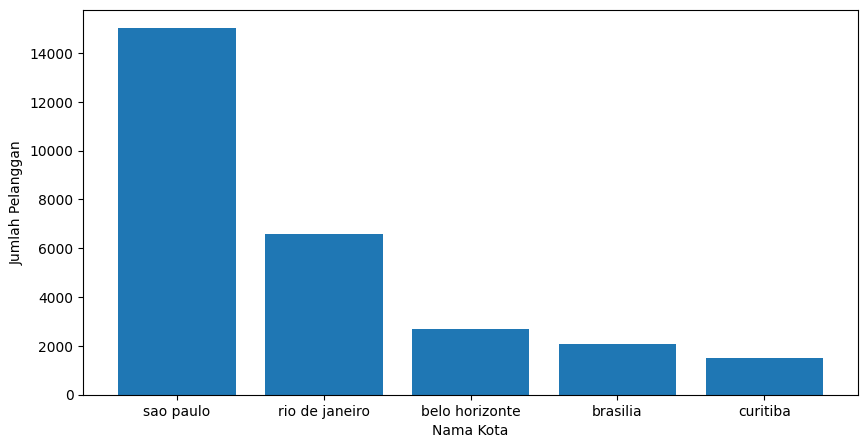

In [73]:
fig = plt.figure(figsize = (10,5))

plt.bar(sorted_city['customer_city'], sorted_city['customer_id'])
plt.xlabel("Nama Kota")
plt.ylabel("Jumlah Pelanggan")
plt.show()

### Pertanyaan 2:

### Apa saja lima state teratas dengan jumlah pelanggan terbanyak?

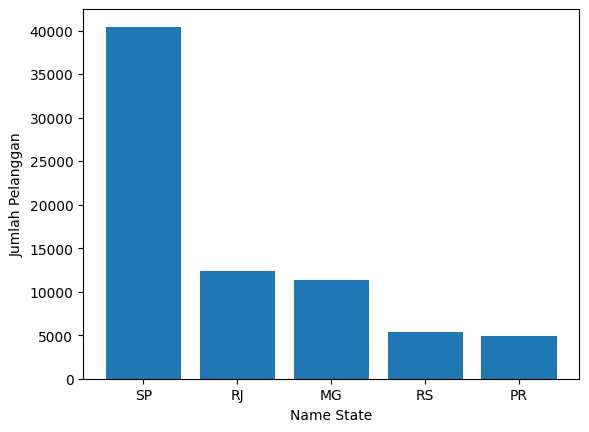

In [74]:
plt.bar(sorted_state['customer_state'], sorted_state['customer_id'])
plt.xlabel("Name State")
plt.ylabel("Jumlah Pelanggan")
plt.show()

## Pertanyaan 3:

Kategori produk apa yang memiliki rata-rata pendapatan tertinggi?

In [75]:
revenue_category_df = all_df.groupby(by='product_category_name_english').payment_value.sum().sort_values(ascending=True).reset_index()

<ipython-input-76-56051e375ccf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name_english', data=revenue_category_df.sort_values(by='payment_value', ascending=False).head(5), palette = colors, ax=ax[0])
<ipython-input-76-56051e375ccf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name_english', data=revenue_category_df.sort_values(by='payment_value', ascending=True).head(), palette=colors, ax=ax[1])


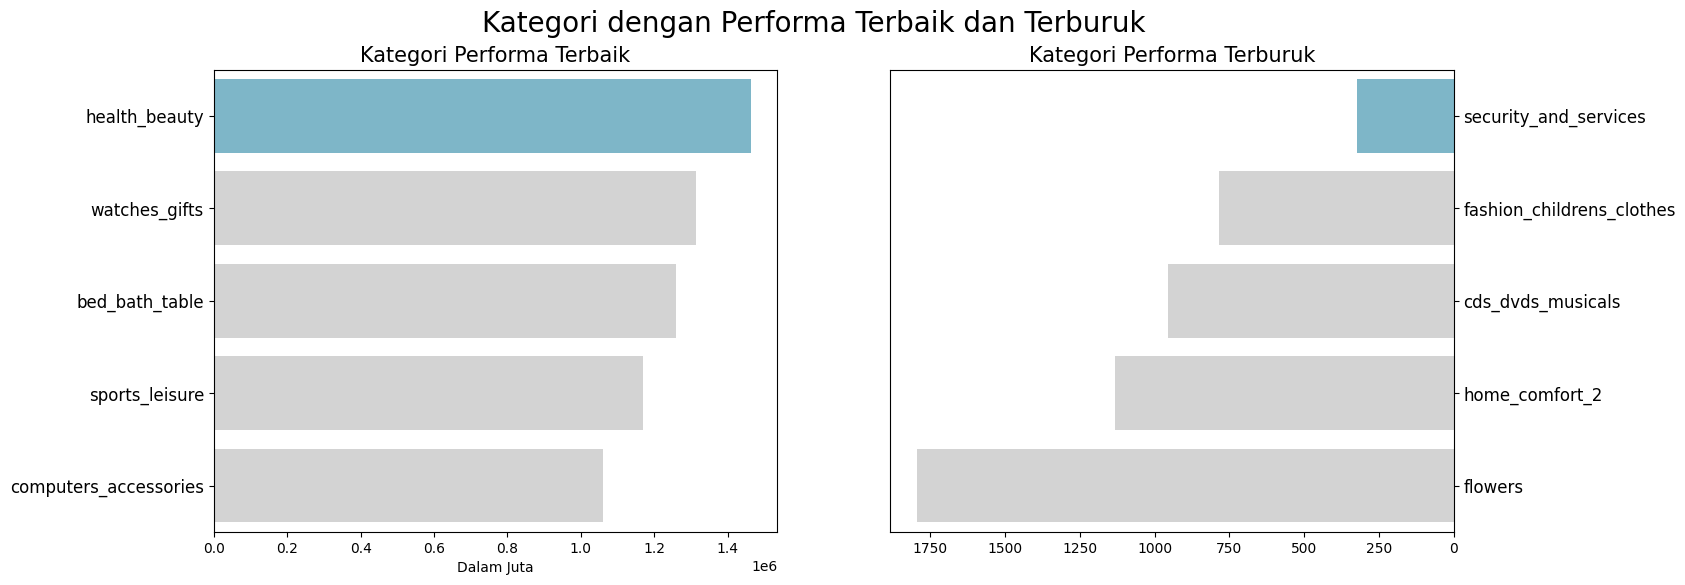

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='payment_value', y='product_category_name_english', data=revenue_category_df.sort_values(by='payment_value', ascending=False).head(5), palette = colors, ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel("Dalam Juta")
ax[0].set_title("Kategori Performa Terbaik", loc = 'center', fontsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(x='payment_value', y='product_category_name_english', data=revenue_category_df.sort_values(by='payment_value', ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Performa Terburuk", loc = 'center', fontsize = 15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Kategori dengan Performa Terbaik dan Terburuk', fontsize=20)
plt.show()

# Pertanyaan 4:

Kategori produk apa dengan jumlah pendapatan paling tinggi berdasarkan state?

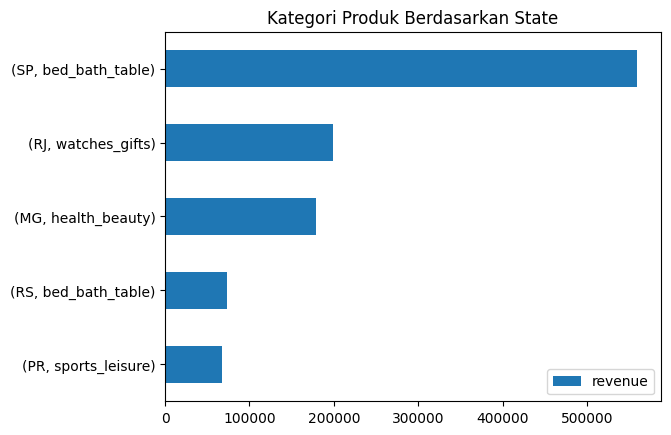

In [77]:
idx = top_category_bystate_df.groupby('customer_state')['revenue'].idxmax()
top_category_bystate_df.loc[idx].sort_values(by='revenue', ascending=False).head(5).plot.barh()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Kategori Produk Berdasarkan State')
plt.gca().invert_yaxis()

plt.show()

# Pertanyaan 5:

Bagaimana performa penjualan dalam beberapa bulan terakhir?

In [78]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id':'nunique',
    'payment_value':'sum'
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id':'order_count',
    'payment_value':'revenue'
}, inplace=True)

last_sixmonths = monthly_orders_df.iloc[-6:]

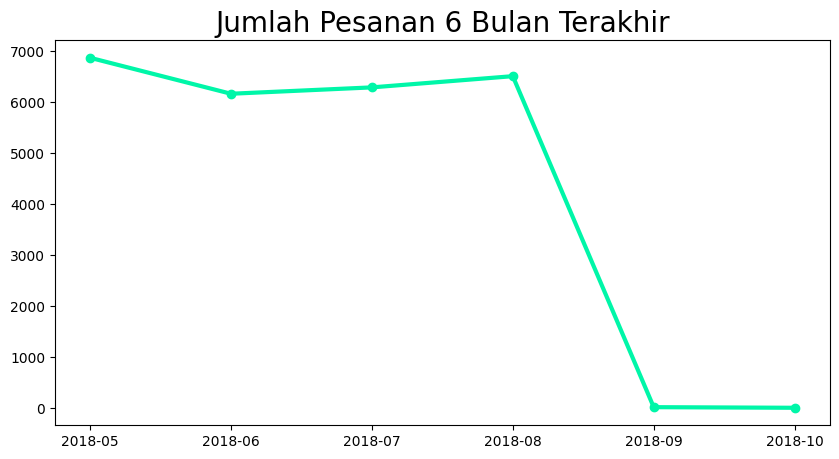

In [79]:
plt.figure(figsize=(10,5))
plt.plot(last_sixmonths['order_purchase_timestamp'], last_sixmonths['order_count'], marker='o', linewidth=3, color='#00f6a8')
plt.title('Jumlah Pesanan 6 Bulan Terakhir', loc = 'center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

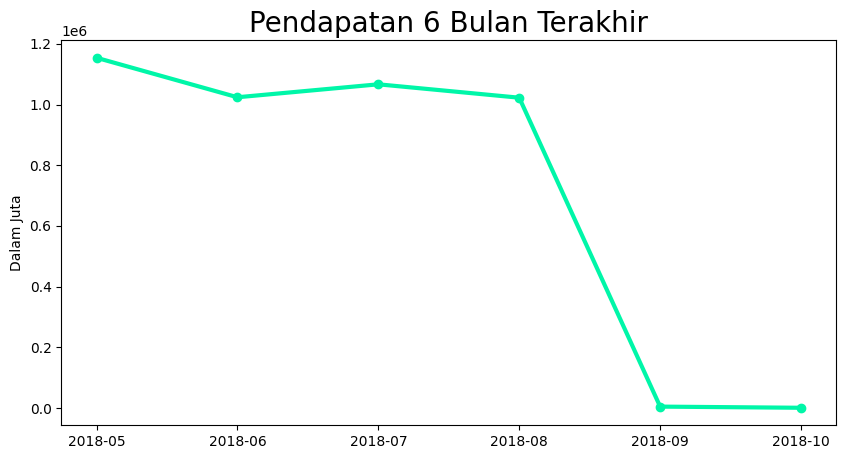

In [80]:
plt.figure(figsize=(10,5))
plt.plot(last_sixmonths['order_purchase_timestamp'], last_sixmonths['revenue'], marker='o', linewidth=3, color='#00f6a8')
plt.title('Pendapatan 6 Bulan Terakhir', loc = 'center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Dalam Juta')
plt.show()

# Pertanyaan 6:

Berapa rata-rata harga tiap produk per kategori?

In [81]:
price_bycategory = gabungan1_df.groupby(by='product_category_name_english').price.mean().sort_values(ascending=False).reset_index()
price_bycategory.head()

,product_category_name_english,price
0,computers,1143.942143
1,small_appliances_home_oven_and_coffee,484.770874
2,home_appliances_2,463.862782
3,agro_industry_and_commerce,329.533148
4,small_appliances,294.984909


<ipython-input-82-a1b41f739335>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


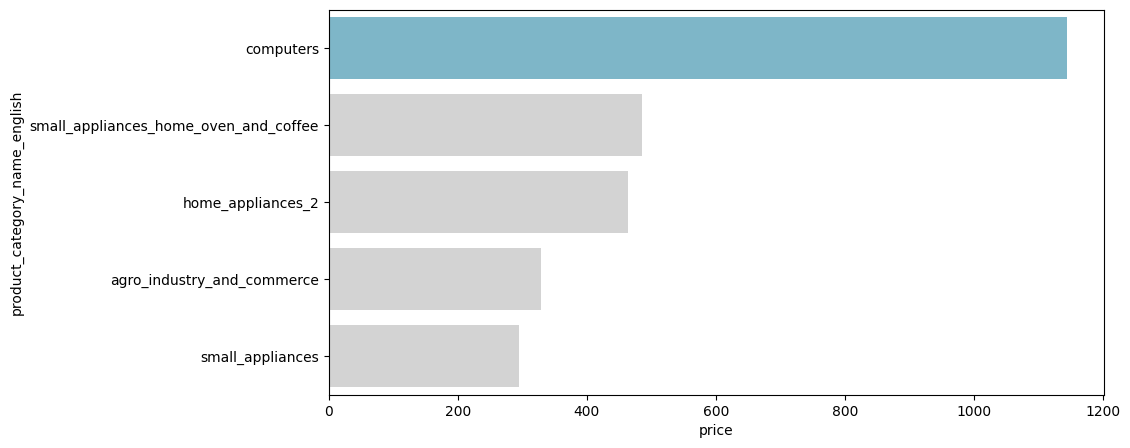

In [82]:
plt.figure(figsize=(10,5))
colors_ = ['#72bcd4', '#d3d3d3', '#d3d3d3', '#d3d3d3', '#d3d3d3']

sns.barplot(
    y='product_category_name_english',
    x='price',
    data=price_bycategory.head().sort_values(by='price',ascending=False),
    palette=colors_
)

plt.show()

## Conclusion

#### 1. Apa saja lima kota teratas dengan jumlah pelanggan paling banyak?
- Tampak bahwa Sao Paulo menduduki peringkat teratas sebagai kota dengan jumlah pelanggan paling banyak dengan jumlah di atas 14.000. Hal ini kemungkinan besar berkaitan dengan kedudukan kota ini sebagai salah satu kota paling pada penduduk di Brazil.

#### 2. Apa saja lima state teratas dengan jumlah pelanggan terbanyak?
- Data perolehan menunjukkan bahwa state SP atau state of Sao Paulo juga menunjukkann posisi tertinggi dalam perolehan jumlah pelanggan. Hal ini tidak dapat dilepaskan dari fakta bahwa state ini merupakan state yang padat penduduk.

#### 3. Kategori produk apa yang memiliki rata-rata pendapatan tertinggi?
- Kategori yang paling banyak menghasilkan pendapatan adalah **health_beauty** dengan nilai sebesar 1,461,833.86 dengan rata-rata pendapatan per transaksi sebesar 158.62. Apabila diamati dari nilai rata-rata pendapatan per transaksinya, kategori **computers** memiliki angka tertinggi.

#### 4. Apa kategori produk dengan pendapatan terbesar di tiap state?
- Kategori bed_bath_table di state Sao Paulo (SP) memiliki pendapatan terbesar senilai 559,957.34 kemudian disusul oleh state Rio de Janeiro (RJ) pada kategori watches_gifts dengan pendapatan sebesar 199,359.27.

#### 5. Bagaimana performa penjualan dalam beberapa bulan terakhir?
- Jumlah pesanan maupun pendapatan mengalami penurunan tajam sejak bulan September. Tampak pada bulan terakhir nilai jumlah pesanan dan pendapatan berbeda drastis dengan bulan-bulan sebelumnya.

### 6. Berapa rata-rata harga tiap kategori produk?
- Harga rata-rata kategori tertinggi adalah **computers** dengan nilai mencapai 1143.9421 dan yang terendah adalah kategori **home_comfort_2** dengan harga rata-rata 29.1.